In [1]:
import numpy as np
from numpy.random import Generator, PCG64
import matplotlib.pyplot as plt
import statistics as stat
import pandas as pd

##**Ornstein-Uhlenbeck noise**
In the following work, we are going to model the parameter $\rho$ of the model as an Ornstein_Uhlenbeck process:

$d\rho_t = \theta(\mu-\rho_t))dt + \alpha dW$.


In [2]:
class LorenzDynamics:
  def __init__(self, sigma, beta, rho_0, dt, alpha, theta, mu):
    self.sigma = sigma
    self.beta = beta
    self.rho = rho_0
    self.alpha = alpha
    self.dt = dt
    self.theta = theta
    self.mu = mu
    self.noise_values = []
    self.current_noise = 0

  def ornstein_uhlenbeck_rho(self):
    dW = np.sqrt(self.dt)*np.random.normal()
    self.rho += self.theta * (self.mu - self.rho) * self.dt + self.alpha * dW
    self.noise_values.append(self.rho)
    return self.noise_values

  def dynamics(self,state,t):
    self.ornstein_uhlenbeck_rho()
    x,y,z = state
    dxdt = self.sigma*(y-x)
    dydt = x*(self.rho-z)-y
    dzdt = x*y-self.beta*z
    return np.array([dxdt,dydt,dzdt])

  def runge_kutta(self,state,t):
    h = self.dt
    k1 = self.dynamics(state,t)
    k2 = self.dynamics(state+(h/2)*k1,t+h/2)
    k3 = self.dynamics(state+(h/2)*k2,t+h/2)
    k4 = self.dynamics(state+h*k3,t+h)
    new_state = state + (h/6)*(k1+2*k2+2*k3+k4)
    return new_state

  def solve(self,IC,T):
    t_values = np.arange(0,T,self.dt)
    states = np.zeros((len(t_values),len(IC)))
    states[0] = IC
    for i in range(1,len(t_values)):
      states[i] = self.runge_kutta(states[i-1],t_values[i-1])
    return t_values,states

  def get_noise_distribution(self):
    return self.noise_values

In [35]:
T = 6000
dt = 0.005
IC = np.array([14,15,27])
n_sim = 10

sigma = 10.0
beta = 8.0/3.0
rho_0 = 26.0
alpha = 1
theta = 0.1
mu = 28
#mu_values = [26,28,30,32]
#alpha_values = [0.1,1,2,5]
#theta_values = [0.01,0.1,1,10]
'''
results = {}

for theta in theta_values:
  lorenz = LorenzDynamics(sigma,beta,rho_0,dt,alpha,theta,mu)
  t_values,states = lorenz.solve(IC,T)
  results[theta] = (t_values, states)

for mu in mu_values:
  lorenz = LorenzDynamics(sigma,beta,rho_0,dt,alpha,theta,mu)
  t_values,states = lorenz.solve(IC,T)
  results[mu] = (t_values, states)

for alpha in alpha_values:
  lorenz = LorenzDynamics(sigma,beta,rho_0,dt,alpha,theta,mu)
  t_values,states = lorenz.solve(IC,T)
  results[alpha] = (t_values, states)
  '''

'\nresults = {}\n\nfor theta in theta_values:\n  lorenz = LorenzDynamics(sigma,beta,rho_0,dt,alpha,theta,mu)\n  t_values,states = lorenz.solve(IC,T)\n  results[theta] = (t_values, states)\n\nfor mu in mu_values:\n  lorenz = LorenzDynamics(sigma,beta,rho_0,dt,alpha,theta,mu)\n  t_values,states = lorenz.solve(IC,T)\n  results[mu] = (t_values, states)\n\nfor alpha in alpha_values:\n  lorenz = LorenzDynamics(sigma,beta,rho_0,dt,alpha,theta,mu)\n  t_values,states = lorenz.solve(IC,T)\n  results[alpha] = (t_values, states)\n  '

In [18]:
'''
def plot_trajectories(t_values, states, theta, save = False):
  string = str(theta)
  fig = plt.figure(figsize=(10, 7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(states[:,0],states[:,1],states[:,2])
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title(f'Lorenz dynamics trajectories (Theta={string})')
  if save:
    plt.savefig(f'trajectories_alpha_{string}.png')
  plt.show()
for theta, (t_values, states) in results.items():
  plot_trajectories(t_values,states,theta)

'''

In [36]:
def single_run(sigma,beta,rho_0,dt,alpha,theta,mu):
  lorenz = LorenzDynamics(sigma,beta,rho_0,dt,alpha,theta,mu)
  t_values,states = lorenz.solve(IC,T)
  return states

In [37]:
def generate_IC():
  for i in range(n_sim):
    x_0 = IC[0] + np.random.rand()
    y_0 = IC[1] + np.random.rand()
    z_0 = IC[0] + np.random.rand()
  return np.array([x_0,y_0,z_0])

In [38]:
all_states = []
for i in range(n_sim):
  IC = generate_IC()
  states = single_run(sigma,beta,rho_0,dt,alpha,theta,mu)
  all_states.append(states)

all_states = np.concatenate(all_states, axis = 0)

In [39]:
x_values = all_states[:,0]
y_values = all_states[:,1]
z_values = all_states[:,2]

In [40]:
def statistics(states):
  x = states[:,0]
  y = states[:,1]
  z = states[:,2]
  return {
      'x_mean' : np.mean(x),
      'x_std' : np.std(x),
      'y_mean' : np.mean(y),
      'y_std' : np.std(y),
      'z_mean' : np.mean(z),
      'z_std' : np.std(z),
  }

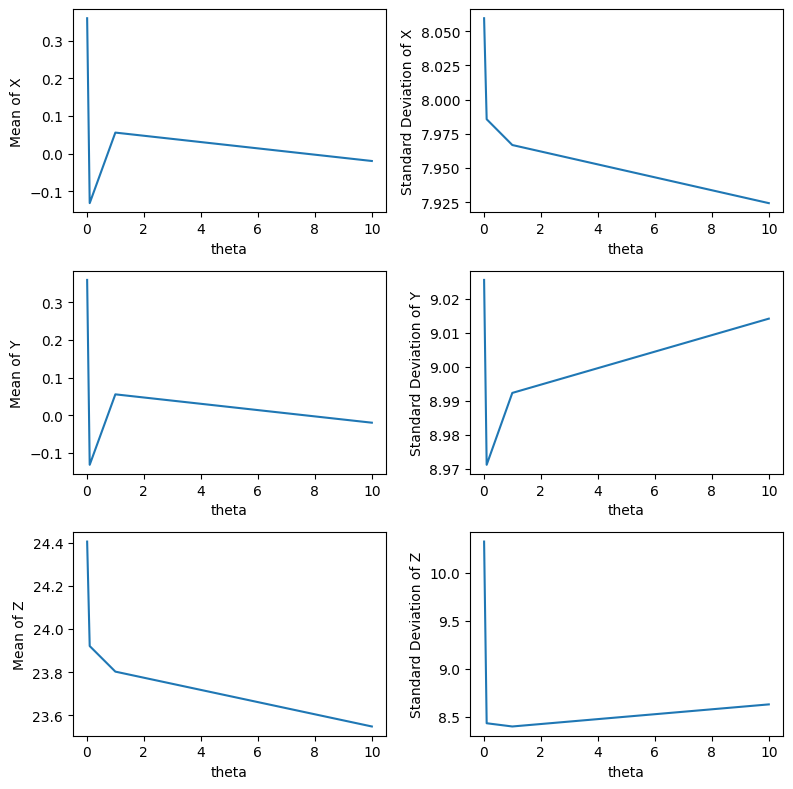

In [24]:
'''
x_means = []
x_stds = []
y_means = []
y_stds = []
z_means = []
z_stds = []

for theta, (t_values, states) in results.items():
    stats = statistics(states)
    x_means.append(stats['x_mean'])
    x_stds.append(stats['x_std'])
    y_means.append(stats['y_mean'])
    y_stds.append(stats['y_std'])
    z_means.append(stats['z_mean'])
    z_stds.append(stats['z_std'])

# Plot the statistics
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.plot(theta_values, x_means)
plt.xlabel('theta')
plt.ylabel('Mean of X')

plt.subplot(3, 3, 2)
plt.plot(theta_values, x_stds)
plt.xlabel('theta')
plt.ylabel('Standard Deviation of X')

plt.subplot(3, 3, 4)
plt.plot(theta_values, y_means)
plt.xlabel('theta')
plt.ylabel('Mean of Y')

plt.subplot(3, 3, 5)
plt.plot(theta_values, y_stds)
plt.xlabel('theta')
plt.ylabel('Standard Deviation of Y')

plt.subplot(3, 3, 7)
plt.plot(theta_values, z_means)
plt.xlabel('theta')
plt.ylabel('Mean of Z')

plt.subplot(3, 3, 8)
plt.plot(theta_values, z_stds)
plt.xlabel('theta')
plt.ylabel('Standard Deviation of Z')

plt.tight_layout()
plt.show()
'''

## **Bifurcation Diagram**

In [ ]:
T = 6000
dt = 0.005
IC = np.array([14,15,27])

sigma = 10.0
beta = 8.0/3.0
rho_0 = 26.0
alpha = 0.1
mu = 26.0
theta = 0.1

lorenz = LorenzDynamics(sigma,beta,rho_0,dt,alpha,theta,mu)
t_values,states = lorenz.solve(IC,T)

x_values = states[:,0]
y_values = states[:,1]
z_values = states[:,2]

In [ ]:
# Linear time-varying rho parameter
rho_values = np.array([lorenz.rho(t) for t in t_values])
plt.figure(figsize=(8, 5))
plt.plot(t_values, rho_values)
plt.xlabel('Time')
plt.ylabel('Rho')
plt.title('Linear parameters Evolution')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(rho_values, z_values, s=0.1)
plt.xlabel('Rho')
plt.ylabel('Z')
plt.title('Bifurcation Diagram (Z vs. Rho)')
plt.grid(True)
plt.show()

## **Probability Density Functions**

In [ ]:
x_mean = stat.mean(x_values)
x_std = stat.stdev(x_values)
x_median = stat.median(x_values)

y_mean = stat.mean(y_values)
y_std = stat.stdev(y_values)
y_median = stat.median(y_values)

z_mean = stat.mean(z_values)
z_std = stat.stdev(z_values)
z_median = stat.median(z_values)


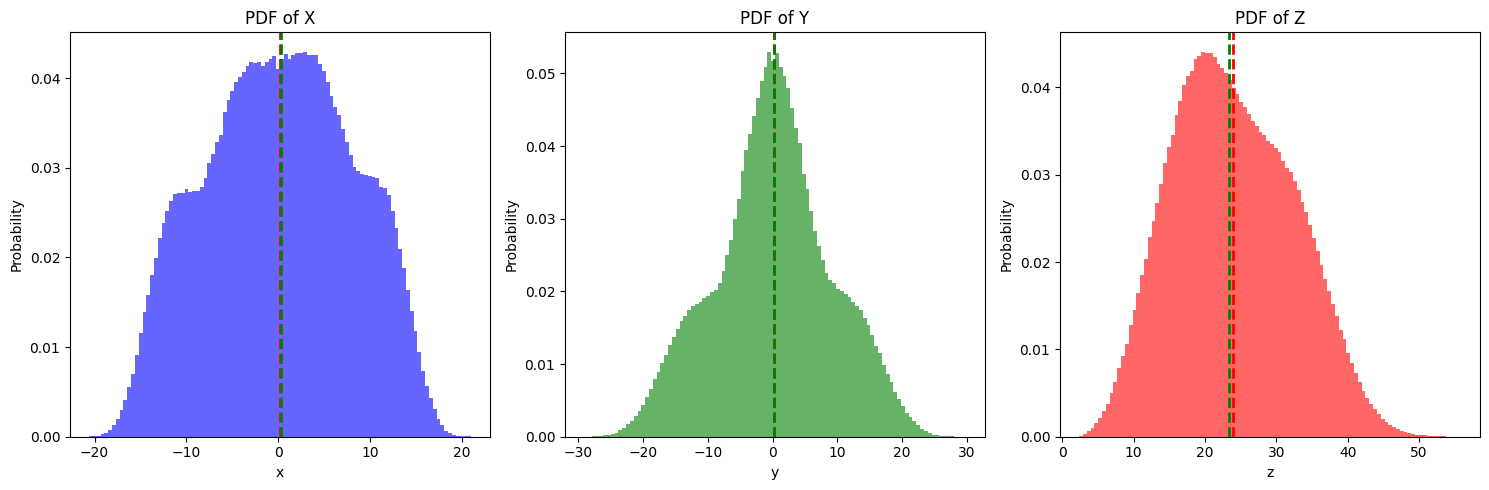

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(x_values, bins=100, density=True, color='blue', alpha=0.6)
axs[0].axvline(x_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[0].axvline(x_median, color='green', linestyle='dashed', linewidth=2, label='Median')
axs[0].set_title('PDF of X')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Probability')

axs[1].hist(y_values, bins=100, density=True, color='green', alpha=0.6)
axs[1].axvline(y_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[1].axvline(y_median, color='green', linestyle='dashed', linewidth=2, label='Median')
axs[1].set_title('PDF of Y')
axs[1].set_xlabel('y')
axs[1].set_ylabel('Probability')

axs[2].hist(z_values, bins=100, density=True, color='red', alpha=0.6)
axs[2].axvline(z_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[2].axvline(z_median, color='green', linestyle='dashed', linewidth=2, label='Median')
axs[2].set_title('PDF of Z')
axs[2].set_xlabel('z')
axs[2].set_ylabel('Probability')

plt.tight_layout()
plt.show()

## **Markov Chain and Macrostate statistics**

In [ ]:
z_quantiles = [22.5,37.9] #75th, 95th quantiles
partitions = []

def assign_region(x,y,z):
  if z < z_quantiles[0]:
    z_index = 0
  elif z < z_quantiles[1]:
    z_index = 1
  else:
    z_index = 2

  if x > 0 and y > 0:
    xy_index = 0
  elif x > 0 and y < 0:
    xy_index = 1
  elif x < 0 and y > 0:
    xy_index = 2
  elif x < 0 and y < 0:
    xy_index = 3

  return z_index*3 + xy_index

for x,y,z in zip(x_values,y_values,z_values):
  partitions.append(assign_region(x,y,z))

In [ ]:
n_partitions = 12
T_mat = np.zeros((n_partitions,n_partitions))
holding_times = np.zeros(n_partitions)
state_counts = np.zeros(n_partitions)

current_state = partitions[0]
time_in_state = 0.0
for i in range(1,len(partitions)):
  next_state = partitions[i]
  time_in_state += dt
  if next_state != current_state:
    T_mat[current_state,next_state] += 1
    holding_times[current_state] += time_in_state
    state_counts[current_state] += 1
    current_state = next_state
    time_in_state = 0.0

for i in range(n_partitions):
  if state_counts[i] > 0:
    holding_times[i] /= state_counts[i]
  else:
    holding_times[i] /= 1 #holding_times = 1

for j in range(n_partitions):
  col_sums = np.sum(T_mat[:,j])
  for i in range(n_partitions):
    if col_sums > 0:
      T_mat[i,j] = T_mat[i,j]/col_sums
  T_mat[j,j] = -np.sum(T_mat[:,j])

HT = np.diag(holding_times)
Q = np.dot(T_mat,HT)

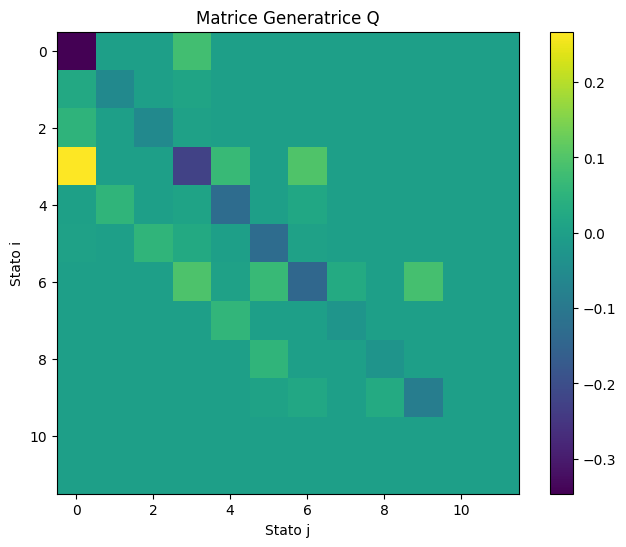

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(Q, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Matrice Generatrice Q')
plt.xlabel('Stato j')
plt.ylabel('Stato i')
plt.show()

In [ ]:
macrostates = []
#macrostates = [0,1,1,0,2]

def assign_macrostate(z):
  if z < z_quantiles[0]:
    return 0
  elif z < z_quantiles[1]:
    return 1
  else:
    return 2

for z in z_values:
  macrostates.append(assign_macrostate(z))

n_macrostates = 3
transition_matrix = np.zeros((n_macrostates,n_macrostates))
holding_times_macro = np.zeros(n_macrostates)
state_counts_macro = np.zeros(n_macrostates)

current_state_macro = macrostates[0]
time_in_state_macro = 0.0

for i in range(1, len(macrostates)):
  next_state_macro = macrostates[i]
  time_in_state_macro += dt
  if next_state_macro != current_state_macro:
    transition_matrix[current_state_macro, next_state_macro] += 1
    holding_times_macro[current_state_macro] += time_in_state_macro
    state_counts_macro[current_state_macro] += 1
    current_state_macro = next_state_macro
    time_in_state_macro = 0.0

for i in range(n_macrostates):
  if state_counts_macro[i] > 0:
    holding_times_macro[i] /= state_counts_macro[i]
  else:
    holding_times_macro[i] /= 1

In [ ]:
macrostates_table = pd.DataFrame({'Mean holding time': holding_times_macro})
macrostates_table.index = ['Macrostate A', 'Macrostato B', 'Macrostato C']
macrostates_table

,Mean holding time
Macrostate A,0.355503
Macrostato B,0.217512
Macrostato C,0.097324
